## Sarcasm Detection in IMDb Movie Reviews

Online reviews hold immense power in the film industry, shaping audience perception and box office success. However, sarcasm a common weapon in the reviewer's arsenal, can wreak havoc on sentiment analysis systems. These automated tools struggle to decipher sarcastic intent, leading to misinterpretations that can skew audience ratings, mislead studios, and ultimately, disappoint moviegoers.<br>

![Sarcasm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh2oNie2NZjxi-5yhoj__Og7FtVcuTz2pS4A&s)

Sarcasm detection involves identifying sarcastic remarks in text, which can be particularly challenging due to the subtlety and context-dependency of sarcasm.<br>

In this code snippet, we'll walk through the outline the steps to build a Deep learning model for sarcasm detection in movie reviews using RoBERTa Model.





### Step 1 : Loading the Data

We start by loading the movie review dataset, which contains both the text of the reviews and their corresponding labels (indicating whether the review is sarcastic or not).

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# File path
file_path = '/content/drive/MyDrive/IMBD/Movie sarcasm Final Dataset.xlsx'

In [6]:
# Read Excel file
import pandas as pd
df = pd.read_excel(file_path)

In [7]:
# Display the first 5 rows of data
df.head()

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic


In [8]:
# Checking for null values
rows_with_nulls = df[df.isnull().any(axis=1)]

print("Rows with any null values:")
print(rows_with_nulls)

# Remove rows with any null values
df = df.dropna()

print("\nDataFrame with rows containing any null values removed:")
print(f"the size of the dataset after the removal of null values {df.shape}")

df

Rows with any null values:
                                                 Review Sentiment Sarcasm
2604  Everyone should totally see this movie! It's f...  positive     NaN
2605  as a sequel,this is not a bad movie.i actually...  positive     NaN
2606  I've just seen this movie in a preview and I c...  positive     NaN
2607  This TV show is possibly the most pathetic dis...  negative     NaN
2608  The first film ever made. Workers streaming fr...  positive     NaN
2609  Just kidding.<br /><br />Seeking greener pastu...  positive     NaN
2610  This film is a total bore. Entrapment is way b...  negative     NaN
2611  This was an attempt toward a romantic comedy, ...  negative     NaN
2612  There are some redeeming qualities to this sho...  negative     NaN
2613  I like David Hamilton's artistic photographs o...  positive     NaN
3087  For anyone who has ever sought happiness, "Hal...  positive     NaN
3389  The ending of this horror movie is so ambiguou...   Neutral     NaN
3402  The a

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


### Step 2 : Checking for Null Values

Before proceeding with data cleaning and analysis, it's essential to check for any missing values in the dataset. Null values can impact the quality of our analysis and may require special handling. In this section, we'll examine the dataset for any null values and address them if necessary.

In [9]:
# Check for null values in the 'Review' column
null_count = df.isnull().sum()
print(f"Number of null values in 'Review' column: {null_count}")


Number of null values in 'Review' column: Review       0
Sentiment    0
Sarcasm      0
dtype: int64


### Step 3 : Checking for Duplicate Values
Duplicate entries can skew analysis and machine learning models. In this section, we'll identify and handle duplicate records in the movie review dataset.



In [10]:
# Check for duplicate values
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 29


In [11]:
# Display the duplicate rows
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                                                 Review Sentiment  \
38    I watched this film not really expecting much,...  Negative   
39    I bought this film at Blockbuster for $3.00, b...  Negative   
41    Ever watched a movie that lost the plot? Well,...  Negative   
260   A cinematic marvel! It's like they took all th...  Positive   
261   The dialogue was so sharp, it could cut throug...  Positive   
416           The director's vision is clear... as mud.  Negative   
417   The screenplay is truly groundbreaking... if y...  Negative   
418   The acting performances are unforgettable... b...  Negative   
419   The cinematography is breathtaking... if you'r...  Negative   
420   The soundtrack is memorable... in the same way...  Negative   
421   The character dynamics are engaging... if you ...  Negative   
422   The plot twists are shocking... because you ca...  Negative   
423   The special effects are out of this world... i...  Negative   
424   The editing 

In [12]:
# Checking for duplicates based on 'Review', 'Sentiment'and 'Sarcasm'
specific_duplicates = df.duplicated(subset=['Review'])
print(f"Number of duplicate rows based on specific columns: {specific_duplicates.sum()}")

Number of duplicate rows based on specific columns: 34


In [13]:
# Remove duplicate rows from the entire dataframe
df_no_duplicates = df.drop_duplicates(subset=['Review'])
print(f"Number of rows after removing duplicates: {df_no_duplicates.shape[0]}")
df = df_no_duplicates
df.shape

Number of rows after removing duplicates: 6497


(6497, 3)

### Step 4 : Identifying Unique Values for Labelling Correction

Before proceeding with the labelling correction process, it's essential to identify all unique values present in the column of interest ("sentiment" or "sarcasm"). This step is crucial because manual labelling may lead to spelling mistakes, variations in labelling terminologies, or inconsistencies in labelling conventions.

First, let's gain an understanding of the data by examining the unique values present in the column of interest. This will help us identify any misspelled labels, variations in labelling, or redundant labels that need to be corrected.






In [14]:
# Check the count of unique values in the 'sentiment' column and 'sarcasm' column
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sarcasm' column:")
print(sarcasm_counts)


Count of unique values in the 'sentiment' column:
Sentiment
Negative     2757
positive     1469
negative     1426
Positive      830
Neutral        13
Nositive        1
Negative        1
Name: count, dtype: int64
Count of unique values in the 'sarcasm' column:
Sarcasm
Sarcastic         3501
Not Sarcastic     1060
Not sarcastic      917
Non-Sarcastic      889
not Sarcastic       62
Non-sarcastic       30
non-sarcastic       16
sarcastic           14
Non-Sarcastic        3
Sarcasm              2
Non-sarcasm          1
nsa                  1
Sarcastic            1
Name: count, dtype: int64


### Step 5 : Analyzing Unique Values and Labelling Correction
After obtaining the unique values, carefully analyze them to identify any inconsistencies or variations in labelling. Pay attention to spelling mistakes, synonymous labels, or redundant categories that need to be consolidated for accurate labelling.

Once you've identified the unique values and potential labelling inconsistencies, proceed with correcting the labels. This may involve standardizing labels, correcting spelling errors, or merging synonymous categories to ensure consistency and accuracy in labelling.

In [15]:
# Lowercase the values
df['Sentiment'] = df['Sentiment'].str.lower()
df['Sarcasm'] = df['Sarcasm'].str.lower()

<ipython-input-15-5ad5a1db05fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].str.lower()
<ipython-input-15-5ad5a1db05fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].str.lower()


In [16]:
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative     4183
positive     2299
neutral        13
nositive        1
negative        1
Name: count, dtype: int64


In [17]:
# Change the value
df['Sentiment'] = df['Sentiment'].replace({'negative ': 'negative', 'nositive': 'positive'})

<ipython-input-17-e01205599a22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].replace({'negative ': 'negative', 'nositive': 'positive'})


In [18]:
# Again check Values
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative    4184
positive    2300
neutral       13
Name: count, dtype: int64


In [19]:
# Check for 'Sarcasm'
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic         3515
not sarcastic     2039
non-sarcastic      935
non-sarcastic        3
sarcasm              2
non-sarcasm          1
nsa                  1
sarcastic            1
Name: count, dtype: int64


In [20]:
# Change the label
df['Sarcasm'] = df['Sarcasm'].replace({'sarcastic ': 'sarcastic', 'sarcasm': 'sarcastic', 'not sarcastic': 'non-sarcastic', 'nsa': 'non-sarcastic', 'non-sarcastic ': 'non-sarcastic', 'non-sarcasm': 'non-sarcastic'})

<ipython-input-20-1e23cfcf3902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].replace({'sarcastic ': 'sarcastic', 'sarcasm': 'sarcastic', 'not sarcastic': 'non-sarcastic', 'nsa': 'non-sarcastic', 'non-sarcastic ': 'non-sarcastic', 'non-sarcasm': 'non-sarcastic'})


In [21]:
# Again Check for 'Sarcasm' column
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic        3518
non-sarcastic    2979
Name: count, dtype: int64


### Step 6 : Insight from Counting Combinations of Sentiment and Sarcasm

1. **Positive Sentiment with Sarcasm** : Recognizing instances where positive sentiments are expressed sarcastically allows the sarcasm detection model to distinguish between genuine positive sentiment and sarcastic remarks disguised as positivity. By identifying patterns indicative of sarcasm within positive contexts, the model can better discern nuanced expressions.

2. **Positive Sentiment with Non-Sarcasm** : Understanding the frequency of genuinely positive sentiments without sarcasm provides a baseline for comparison. By contrasting these instances with positive sentiments accompanied by sarcasm, the model can learn to differentiate between sincere expressions of positivity and sarcastic ones, enhancing its ability to identify sarcasm accurately.

3. **Negative Sentiment with Sarcasm** : Identifying cases where negative sentiments are conveyed sarcastically helps the model capture the subtleties of sarcastic negativity. By recognizing patterns characteristic of sarcasm within negative contexts, the model can accurately identify instances where negative sentiments are expressed ironically or satirically.

4. **Negative Sentiment without Sarcasm** : Analyzing instances of sincere negative sentiments provides insight into the severity and intensity of negative opinions expressed without sarcasm. By distinguishing between genuine expressions of negativity and sarcastic ones, the model can avoid misinterpreting straightforward negative remarks as sarcastic, ensuring more accurate detection of sarcasm.

5. **Neutral Sentiment with Sarcasm** : Recognizing instances where sentiments are neutral but sarcasm is present helps the model understand sarcasm in a broader context. It allows the model to identify sarcasm even when the sentiment of the text is neither positive nor negative. By capturing sarcasm in neutral contexts, the model becomes more robust and versatile, capable of detecting sarcasm across a wide range of textual expressions.

In [22]:
# Count of each combination of sentiment and sarcasm
combination_counts = df.groupby(['Sentiment', 'Sarcasm']).size().reset_index(name='counts')
print(combination_counts)

  Sentiment        Sarcasm  counts
0  negative  non-sarcastic    1025
1  negative      sarcastic    3159
2   neutral      sarcastic      13
3  positive  non-sarcastic    1954
4  positive      sarcastic     346


### Step 7 : Removing HTML Tags from Text

When dealing with text data extracted from sources like web pages or online documents, it's common to encounter HTML tags that need to be removed for further analysis. HTML tags can contain formatting or structural information irrelevant to the text's semantic meaning.


In [23]:
# Remove HTML tags from the text columns
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
    # Replace HTML line breaks with space
    clean = re.sub(r'<br\s*/?>', ' ', clean)
    # Remove extra spaces
    clean = re.sub(r'\s+', ' ', clean).strip()
    clean = re.sub(r'"', ' ', clean).strip()

df['Review'] = df['Review'].apply(remove_html_tags)

df.head()

<ipython-input-23-6a9bd2ef7ca3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(remove_html_tags)


,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,non-sarcastic
1,A wonderful little production. The filming tec...,positive,non-sarcastic
2,This movie was a groundbreaking experience! I'...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,non-sarcastic
4,Basically there's a family where a little boy ...,negative,sarcastic


In [24]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80's and it's currently ...,negative,non-sarcastic
196,Phantasm ....Class. Phantasm II.....awesome. P...,negative,non-sarcastic
197,Ludicrous. Angelic 9-year-old Annakin turns in...,negative,non-sarcastic
198,"Scotty (Grant Cramer, who would go on to star ...",negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


### Step 8 : Insight on Special Symbols and Punctuation Marks Indicative of Sarcasm

Special symbols and punctuation marks that can be indicative of sarcasm include:

1. **Ellipses (`...`)** : Often used to imply something left unsaid or to create a sarcastic tone.
2. **Quotation Marks (`"`)** : Used to indicate sarcasm by quoting words or phrases in a mocking manner.
3. **Exclamation Marks (`!`)** : Can be used to exaggerate statements, often in a sarcastic tone.
4. **Question Marks (`?`)** : Can be used to imply doubt or irony.
5. **Combination of Exclamation and Question Marks (`!?` or `?!`)** : Used to express incredulity or sarcastic surprise.
6. **Capitalization** : Using all caps for certain words to indicate sarcasm (e.g., "Oh REALLY?").
7. **Parentheses (`(` and `)`)** : Sometimes used to add sarcastic asides or comments.


In [25]:
# Clean the special symbols
def clean_review(text):
    # Remove ellipses
    text = re.sub(r'\.{2,}', '...', text)
    # Remove asterisks
    text = re.sub(r'\*{2,}', '*', text)
    # Remove any character that is not a letter, number, punctuation, or whitespace
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'\"()\-]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Review'] = df['Review'].apply(clean_review)

<ipython-input-25-90ac83c85de2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(clean_review)


In [26]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80's and it's currently ...,negative,non-sarcastic
196,Phantasm ...Class. Phantasm II...awesome. Phan...,negative,non-sarcastic
197,Ludicrous. Angelic 9-year-old Annakin turns in...,negative,non-sarcastic
198,"Scotty (Grant Cramer, who would go on to star ...",negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


In [27]:
# Calculate the percentage of sarcasm
sarcasm_percentage = (df['Sarcasm'].value_counts(normalize=True) * 100).round(2)
sarcasm_percentage

Sarcasm
sarcastic        54.15
non-sarcastic    45.85
Name: proportion, dtype: float64

In [28]:
# Calculate the percentage of each combination of sentiment and sarcasm
combination_percentage = (df.groupby(['Sentiment', 'Sarcasm']).size() / len(df) * 100).round(2)
combination_percentage

Sentiment  Sarcasm      
negative   non-sarcastic    15.78
           sarcastic        48.62
neutral    sarcastic         0.20
positive   non-sarcastic    30.08
           sarcastic         5.33
dtype: float64

### Step 9 : Visualization of Sarcasm Distribution:

**1. Percentage of Sarcasm** : The first pie chart displays the distribution of sarcasm within the dataset. By visualizing the percentage of sarcastic remarks relative to non-sarcastic ones, you can understand the prevalence of sarcasm in the overall dataset. A higher percentage of sarcasm indicates a dataset where sarcasm is more prevalent.
Visualization of Sentiment-Sarcasm Combinations:

**2. Percentage of Sentiment-Sarcasm Combinations** : The second pie chart illustrates the distribution of different combinations of sentiment and sarcasm. This visualization provides insights into how sarcasm is distributed across different sentiment categories (positive, negative, neutral). By examining the percentages of each combination, you can identify patterns and trends in the occurrence of sarcasm within different sentiment contexts.

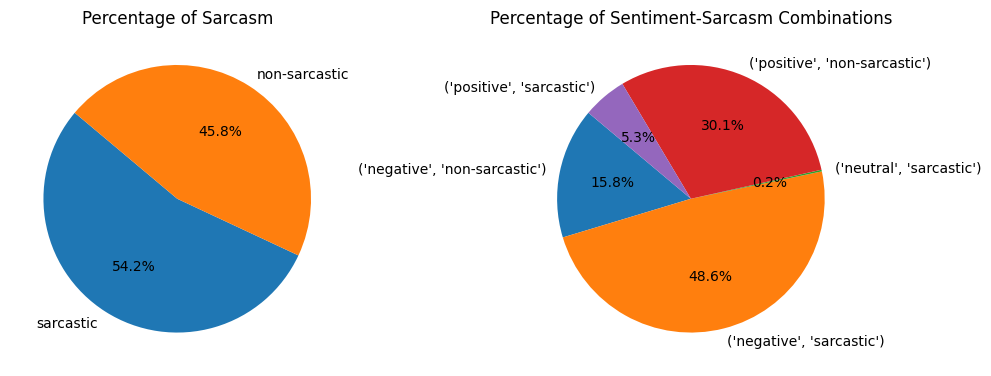

In [29]:
# Plot the data
import matplotlib.pyplot as plt

# Plotting the percentage of sarcasm
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sarcasm_percentage, labels=sarcasm_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sarcasm')

# Plotting the percentage of each combination of sentiment and sarcasm
plt.subplot(1, 2, 2)
plt.pie(combination_percentage, labels=combination_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sentiment-Sarcasm Combinations')

plt.tight_layout()
plt.show()

### Step 10 : Removing Stopwords from Review Data

Stopwords are common words in a language (e.g., "the", "is", "and") that are typically filtered out before or after processing natural language data. Removing stopwords helps to focus on the more meaningful words in the reviews.


In [30]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Insight:

1. Takes a string of text as input.
2. Splits the text into individual words.
3. Filters out the stopwords.
4. Joins the remaining words back into a single string.
5. Returns the cleaned string.

For example : ***Another masterpiece where nothing happens, don't waste your time!***<br>
The Function would remove common stop words like **"where,"** **"nothing,"** **"don't,"** and **"your,"** leaving behind the more meaningful content of the sentence.<br>

Output : ***Another masterpiece happens, waste time!***

In [31]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Review'] = df['Review'].apply(remove_stopwords)

<ipython-input-31-8766b28cf9f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(remove_stopwords)


In [32]:
df.head()

,Review,Sentiment,Sarcasm
0,One reviewers mentioned watching 1 Oz episode ...,positive,non-sarcastic
1,wonderful little production. filming technique...,positive,non-sarcastic
2,movie groundbreaking experience! I've never se...,positive,sarcastic
3,thought wonderful way spend time hot summer we...,positive,non-sarcastic
4,Basically there's family little boy (Jake) thi...,negative,sarcastic


### Step 11 : Label Encoding
**Purpose** : Encodes categorical variables into integer labels.<br>
**Usage** : Often used for encoding target variables or categorical variables with ordinal relationships.<br>
**Advantages**:
- Converts categorical labels into integers, making them easier for machine learning algorithms to process as they typically work with numerical data.<br>

**Considerations** :
- Assigns integers based on the alphabetical order or first appearance in the dataset, potentially implying an ordinal relationship between categories (e.g.,sarcastic = 1, non-sarcastic = 0), which may not always be appropriate if categories have no inherent order.

- Transformation may discard some nuances present in original categorical labels, potentially affecting model performance in tasks relying on subtle differences between categories (e.g., sarcasm detection).

In [33]:
from sklearn.preprocessing import LabelEncoder
# Apply Label encoder on sentiment and sarcasm columns
encoder = LabelEncoder()
df['Sarcasm_Label'] = encoder.fit_transform(df['Sarcasm'])

<ipython-input-33-5dbec02a0f3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm_Label'] = encoder.fit_transform(df['Sarcasm'])


In [34]:
df.head()

,Review,Sentiment,Sarcasm,Sarcasm_Label
0,One reviewers mentioned watching 1 Oz episode ...,positive,non-sarcastic,0
1,wonderful little production. filming technique...,positive,non-sarcastic,0
2,movie groundbreaking experience! I've never se...,positive,sarcastic,1
3,thought wonderful way spend time hot summer we...,positive,non-sarcastic,0
4,Basically there's family little boy (Jake) thi...,negative,sarcastic,1


**Output Explanation** :
1. **Encoded Sarcasm Labels** : Each unique sarcasm category (sarcastic, non-sarcastic, etc.) is assigned a unique numerical label.<br>Similarly, labels are assigned in alphabetical order (**non-sarcastic** = 0, **sarcastic** = 1).<br>



### Step 12 : Split Dataset into Train, Test and validation

Training set: 5197 samples
Validation set: 650 samples
Test set: 650 samples


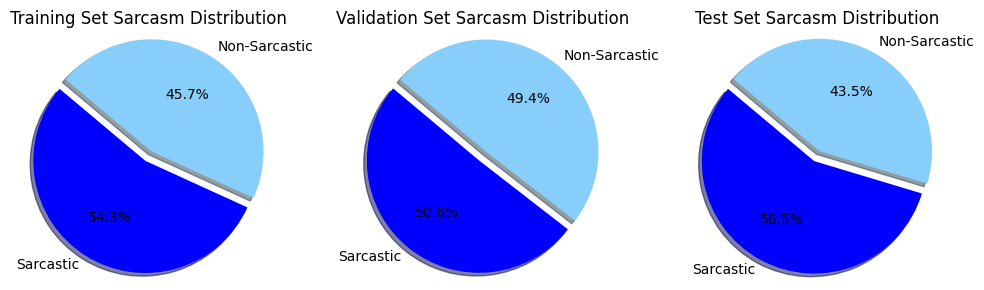

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Split the data into training (80%) and temporary (20%) sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Split the temporary set into validation (50%) and test (50%) sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the number of samples in each set
print(f'Training set: {len(train_df)} samples')
print(f'Validation set: {len(val_df)} samples')
print(f'Test set: {len(test_df)} samples')

# Function to plot pie chart
def plot_pie_chart(dataframe, title, ax):
    sarcasm_count = dataframe['Sarcasm_Label'].sum()
    non_sarcasm_count = len(dataframe) - sarcasm_count

    labels = ['Sarcastic', 'Non-Sarcastic']
    sizes = [sarcasm_count, non_sarcasm_count]
    colors = ['blue', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=140)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Plot pie charts for each set
plot_pie_chart(train_df, 'Training Set Sarcasm Distribution', axs[0])
plot_pie_chart(val_df, 'Validation Set Sarcasm Distribution', axs[1])
plot_pie_chart(test_df, 'Test Set Sarcasm Distribution', axs[2])

plt.tight_layout()
plt.show()


### Step 13 : Check for class imbalance in Trai dataset
Our dataset have one column Sarcasm_Label that represent target variables. <br>
Typically, this involves counting the occurrences of each class within target variables and then assessing whether there is a significant disparity between the counts of different classes.

In [36]:
# Check class distribution for Sarcasm_Label
sarcasm_counts = train_df['Sarcasm_Label'].value_counts()
print("\nSarcasm Label Distribution:")
print(sarcasm_counts)
print()

# Determine if Sarcasm_Label is imbalanced
is_imbalanced = False
for count in sarcasm_counts:
    if count < 0.2 * sarcasm_counts.sum():
        is_imbalanced = True
        break

if is_imbalanced:
    print("Sarcasm Label is imbalanced")
else:
    print("Sarcasm Label is balanced")


Sarcasm Label Distribution:
Sarcasm_Label
1    2822
0    2375
Name: count, dtype: int64

Sarcasm Label is balanced


**Output Explanation** :<br>

**Sarcasm_Label Distribution** : Calculates the counts of each unique value in the Sarcasm_Label column.<br>

**Check Imbalance for Sarcasm_Label** : The loop for count in sarcasm_counts iterates through the counts of each unique value. If any count is less than 20% of the total count ***(0.2 * sarcasm_counts.sum())***, it flags the label as imbalanced.<br>

This approach allows us to check for imbalance in columns with two unique values (0, 1). Adjust the threshold (0.2 in this case) according to specific dataset and imbalance criteria.<br>

###Step 14 : Check for GPU

In [37]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Step 15 : Coustom Pytorch dataset and Initialize RoBERTa model

In [38]:
# Custom Dataset class for PyTorch
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        review = str(self.data['Review'].iloc[index])
        sarcasm_label = int(self.data['Sarcasm_Label'].iloc[index])

        inputs = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(sarcasm_label, dtype=torch.long)
        }

### Step 16 : Train Deep Learning Model
Training a RoBERTa model for Sarcasm Detection<br>

**Why Use RoBERTa for Sarcasm Detection?**<br>
RoBERTa (Robustly optimized BERT approach) is an extension of BERT (Bidirectional Encoder Representations from Transformers) designed to achieve better performance on a variety of NLP tasks, including sarcasm detection. Here are some reasons why RoBERTa might be particularly effective for your sarcasm detection in movie reviews

**Higher Capacity** :
- RoBERTa has more parameters compared to many other models, which allows it to capture complex patterns in the data, including the subtle cues associated with sarcasm.<br>

**Pre-trained on Large Datasets** :
- RoBERTa is pre-trained on larger and more diverse datasets compared to other models like BERT. This extensive pre-training allows RoBERTa to capture a richer understanding of language nuances, including sarcasm.<br>

**Dynamic Masking** :
- Unlike BERT, which uses static masking during pre-training, RoBERTa employs dynamic masking. This means the model sees different masked tokens during each epoch of training, leading to better generalization and robustness.<br>

In my experiments, I found that RoBERTa gives the highest accuracy (85%) compared to simple neural networks, CNN, and LSTM. This suggests that RoBERTa's ability to understand and represent the intricate patterns of language in movie reviews, including sarcasm, is superior to these other models. Its sophisticated architecture and extensive pre-training enable it to perform well in tasks that require deep contextual understanding.

In [39]:
# Initialize RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

###Step 17 : Early stopping

In [40]:
# Training function with early stopping
def train_model(model, train_dataloader, val_dataloader, optimizer, num_epochs=10, patience=3):
    best_accuracy = 0.0
    early_stopping_counter = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_dataloader)
        print(f'Training Loss: {avg_train_loss:.4f}')

        # Validation
        val_loss, val_accuracy = evaluate_model(model, val_dataloader)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

        # Early stopping
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1

        if early_stopping_counter > patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break



In [41]:
# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels).item()

            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)

    return avg_loss, accuracy


### Step 18 : Train Model

In [42]:
# Define max length of input for RoBERTa
max_length = 128

# Create datasets and dataloaders
train_dataset = CustomDataset(train_df, tokenizer, max_length)
val_dataset = CustomDataset(val_df, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer
optimizer = Adam(model.parameters(), lr=2e-5)

# Train the model with early stopping
train_model(model, train_dataloader, val_dataloader, optimizer, num_epochs=10, patience=3)


Epoch 1/10: 100%|██████████| 325/325 [01:54<00:00,  2.84it/s]


Training Loss: 0.3777


Evaluating: 100%|██████████| 21/21 [00:05<00:00,  3.61it/s]


Validation Loss: 0.3990, Validation Accuracy: 0.8385


Epoch 2/10: 100%|██████████| 325/325 [01:56<00:00,  2.79it/s]


Training Loss: 0.2955


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.63it/s]


Validation Loss: 0.3110, Validation Accuracy: 0.8600


Epoch 3/10: 100%|██████████| 325/325 [01:55<00:00,  2.80it/s]


Training Loss: 0.2593


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.77it/s]


Validation Loss: 0.3420, Validation Accuracy: 0.8662


Epoch 4/10: 100%|██████████| 325/325 [01:55<00:00,  2.81it/s]


Training Loss: 0.2313


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.59it/s]


Validation Loss: 0.3308, Validation Accuracy: 0.8662


Epoch 5/10: 100%|██████████| 325/325 [01:55<00:00,  2.81it/s]


Training Loss: 0.1935


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.76it/s]


Validation Loss: 0.4524, Validation Accuracy: 0.8600


Epoch 6/10: 100%|██████████| 325/325 [01:55<00:00,  2.81it/s]


Training Loss: 0.1663


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.57it/s]


Validation Loss: 0.4909, Validation Accuracy: 0.8585


Epoch 7/10: 100%|██████████| 325/325 [01:55<00:00,  2.82it/s]


Training Loss: 0.1273


Evaluating: 100%|██████████| 21/21 [00:04<00:00,  4.67it/s]

Validation Loss: 0.4453, Validation Accuracy: 0.8569
Early stopping triggered after 7 epochs.


### Step 19 : Evaluation of Model

In [43]:
from sklearn.metrics import classification_report, accuracy_score

# Function to get predictions
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels = labels.cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels)

    return predictions, true_labels

# Get predictions and true labels
predictions, true_labels = get_predictions(model, val_dataloader)

# Generate classification report
report = classification_report(true_labels, predictions, target_names=['Not Sarcastic', 'Sarcastic'])
accuracy = accuracy_score(true_labels, predictions)

print("Classification Report:\n", report)
print("Accuracy: {:.4f}".format(accuracy))

Predicting: 100%|██████████| 21/21 [00:04<00:00,  4.78it/s]

Classification Report:
                precision    recall  f1-score   support

Not Sarcastic       0.83      0.90      0.86       321
    Sarcastic       0.89      0.82      0.85       329

     accuracy                           0.86       650
    macro avg       0.86      0.86      0.86       650
 weighted avg       0.86      0.86      0.86       650

Accuracy: 0.8569


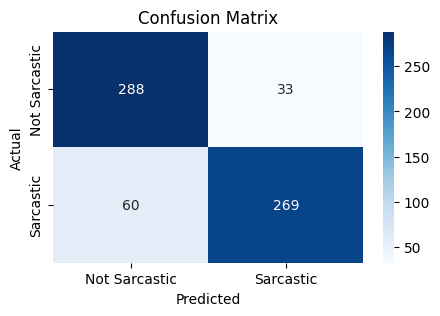

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predictions, classes):
    cm = confusion_matrix(true_labels, predictions)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(figsize=(5, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Define class names
class_names = ['Not Sarcastic', 'Sarcastic']

# Plot confusion matrix
plot_confusion_matrix(true_labels, predictions, class_names)


### Step 20 : Save the Model

In [45]:
import torch
import pickle

# Define a path to save the model
model_save_path = '/content/drive/MyDrive/IMBD/BERT_model.pth'
tokenizer_save_path = '/content/drive/MyDrive/IMBD/bert_tokenizer.pkl'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

# Save the tokenizer using pickle
with open(tokenizer_save_path, 'wb') as f:
    pickle.dump(tokenizer, f)

print(f'Model saved to {model_save_path}')
print(f'Tokenizer saved to {tokenizer_save_path}')


Model saved to /content/drive/MyDrive/IMBD/BERT_model.pth
Tokenizer saved to /content/drive/MyDrive/IMBD/bert_tokenizer.pkl


In [46]:
# Define a path to load the model
model_load_path = '/content/drive/MyDrive/IMBD/BERT_model.pth'
tokenizer_load_path = '/content/drive/MyDrive/IMBD/bert_tokenizer.pkl'

# Load the tokenizer using pickle
with open(tokenizer_load_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Initialize the model architecture
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Load the model's state dictionary
model.load_state_dict(torch.load(model_load_path))

# Move the model to the appropriate device
model.to(device)
model.eval()

print('Model and tokenizer loaded successfully')


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully


### Step 21 : Check the prediction

In [47]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pickle

# Define paths for the saved model and tokenizer
model_load_path = '/content/drive/MyDrive/IMBD/BERT_model.pth'
tokenizer_load_path = '/content/drive/MyDrive/IMBD/bert_tokenizer.pkl'

# Load the tokenizer using pickle
with open(tokenizer_load_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Initialize the model architecture
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Load the model's state dictionary
model.load_state_dict(torch.load(model_load_path))

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_sarcasm(review, model, tokenizer, max_length=128):
    # Preprocess the input review
    inputs = tokenizer.encode_plus(
        review,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Get the predicted label
    predicted_label = torch.argmax(logits, dim=1).item()

    return 'Sarcastic' if predicted_label == 1 else 'Not Sarcastic'

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
# Example usage
print()
review = "Good movie"
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "This is a funny horror movie!"
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "Don't waste your time on it!"
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()



Review: "Good movie"
Prediction: Not Sarcastic

Review: "This is a funny horror movie!"
Prediction: Sarcastic

Review: "Don't waste your time on it!"
Prediction: Sarcastic



### Summary of Sarcasm Detection Model Performance
**Accuracy and Overall Performance**:
- The RoBERTa model achieved an overall accuracy of 85.69%, which is a strong result for sarcasm detection in movie reviews.
- The model shows balanced performance across both classes (Sarcastic and Not Sarcastic), indicating that it does not heavily favor one class over the other.

**Class-wise Performance**:
- **Not Sarcastic**
  1. **Precision** : 0.83, which means that 84% of the reviews predicted as "Not Sarcastic" are actually "Not Sarcastic."
  2. **Recall** : 0.90, indicating that the model correctly identifies 90% of the actual "Not Sarcastic" reviews.
  3. **F1-Score** : 0.86, reflecting a good balance between precision and recall for this class.

- **Sarcastic**
  1. **Precision** : 0.89, meaning 89% of the reviews predicted as "Sarcastic" are indeed sarcastic.
  2. **Recall** : 0.82, showing that the model successfully detects 82% of the actual "Sarcastic" reviews.
  3. **F1-Score** : 0.85, demonstrating a high level of accuracy in both identifying and correctly classifying sarcastic reviews.

**Macro and Weighted Averages**:<br>
The macro average (0.86) and weighted average (0.86) for precision, recall, and F1-score are the same, underscoring the model's balanced performance across both classes.<br>

**Interpretation**:
- The RoBERTa model's high precision and recall values for both classes suggest that it is very effective at distinguishing between sarcastic and non-sarcastic reviews.
- The balanced F1-scores indicate that the model is equally proficient at minimizing false positives and false negatives, which is crucial for a nuanced task like sarcasm detection.
- With an accuracy close to 86%, the RoBERTa model is a reliable choice for your sarcasm detection task, surpassing the performance of simpler models like neural networks, CNNs, and LSTMs.

### Conclusion:
The RoBERTa model's performance highlights its robustness and effectiveness in handling the complexities of sarcasm detection in movie reviews. Its ability to achieve high precision, recall, and F1-scores for both sarcastic and non-sarcastic classes makes it a superior model for this task.






